In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

warnings.filterwarnings("ignore")

# Load the data
df = pd.read_csv('cleaned_weather_data.csv')

# Convert cloud coverage to categories
df['Cloud_Category'] = pd.cut(df['Cloud Coverage'], 
                             bins=[0, 25, 50, 75, 100],
                             labels=['Clear', 'Partly Cloudy', 'Mostly Cloudy', 'Overcast'],
                             include_lowest=True)

# Select features for modeling
features = ['Temperature', 'Humidity', 'Pressure', 'Wind Speed', 'Visibility']
X = df[features]
y = df['Cloud_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Visualizing the Main DataFrame
print("Main DataFrame:")
df.head()

Main DataFrame:


,City,Date & Time,Temperature,Temp Min,Temp Max,Humidity,Pressure,Wind Speed,Visibility,Cloud Coverage,Weather Description,Rain Volume (last 3h) cleaned,Snow Volume (last 3h) cleaned,Month-Day,Time,Day,Cloud_Category
0,Boulder,1/27/2025 0:00,-7.30,-8.52,-7.30,79,1027,2.50,10000.0,90,Overcast clouds,No rain,No snow,27-Jan,0:00,1/27/2025,Overcast
1,Boulder,1/27/2025 3:00,-8.35,-9.18,-8.35,79,1029,3.91,10000.0,43,Scattered clouds,No rain,No snow,27-Jan,3:00,1/27/2025,Partly Cloudy
2,Boulder,1/27/2025 6:00,-8.06,-8.06,-8.06,78,1029,4.66,10000.0,11,Few clouds,No rain,No snow,27-Jan,6:00,1/27/2025,Clear
3,Boulder,1/27/2025 9:00,-7.21,-7.21,-7.21,74,1028,5.12,10000.0,4,Clear sky,No rain,No snow,27-Jan,9:00,1/27/2025,Clear
4,Boulder,1/27/2025 12:00,-6.62,-6.62,-6.62,70,1026,6.09,10000.0,4,Clear sky,No rain,No snow,27-Jan,12:00,1/27/2025,Clear


In [3]:
# Display summary statistics
print("\nSummary Statistics:")
print(df[features + ['Cloud_Category']].describe())


Summary Statistics:
       Temperature    Humidity     Pressure  Wind Speed    Visibility
count   600.000000  600.000000   600.000000  600.000000    600.000000
mean     -0.462633   66.226667  1019.686667    2.065800   9642.253782
std       4.216413   16.859093     5.887807    1.253206   1620.317876
min     -11.820000   15.000000  1008.000000    0.100000     36.000000
25%      -3.032500   54.000000  1015.000000    1.270000  10000.000000
50%       0.170000   65.000000  1019.000000    1.880000  10000.000000
75%       2.405000   80.000000  1024.000000    2.532500  10000.000000
max      12.260000  102.000000  1034.000000    8.810000  10000.000000


In [4]:
## 2. Visualizing Training and Testing Sets
print("\nTraining set shape:", X_train.shape)
X_train.head()


Training set shape: (480, 5)


,Temperature,Humidity,Pressure,Wind Speed,Visibility
145,0.18,64,1020,0.53,10000.0
9,-5.08,63,1024,5.04,10000.0
375,4.06,52,1015,0.16,10000.0
523,-11.12,81,1032,1.70,10000.0
188,-0.34,66,1016,1.90,10000.0


In [68]:
print("Testing set shape:", X_test.shape)
X_test.head()

Testing set shape: (120, 5)


,Temperature,Humidity,Pressure,Wind Speed,Visibility
110,5.03,50,1011,2.44,10000.0
419,-1.11,60,1023,1.95,10000.0
565,-9.05,76,1029,2.61,10000.0
77,-0.15,87,1015,0.74,10000.0
181,-2.56,60,1026,2.58,10000.0


In [69]:
# Value counts for y_train
print("\ny_train Value Counts:")
print(y_train.value_counts())


y_train Value Counts:
Clear            335
Overcast          80
Partly Cloudy     36
Mostly Cloudy     29
Name: Cloud_Category, dtype: int64


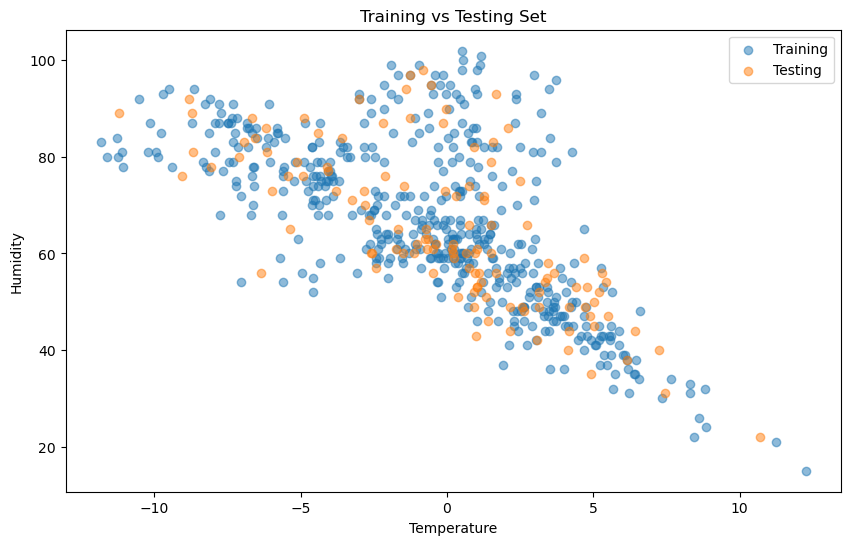

In [70]:
# Visualize the split
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Temperature'], X_train['Humidity'], alpha=0.5, label='Training')
plt.scatter(X_test['Temperature'], X_test['Humidity'], alpha=0.5, label='Testing')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Training vs Testing Set')
plt.legend()
plt.show()

In [71]:
# Adjusting the data to ensure non-negative values for MultinomialNB
# Adding a constant to make all features non-negative
X_train_adjusted = X_train - X_train.min().min()
X_test_adjusted = X_test - X_train.min().min()

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_adjusted, y_train)
y_pred_mnb = mnb.predict(X_test_adjusted)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train_adjusted, y_train)
y_pred_bnb = bnb.predict(X_test_adjusted)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_adjusted, y_train)
y_pred_gnb = gnb.predict(X_test_adjusted)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

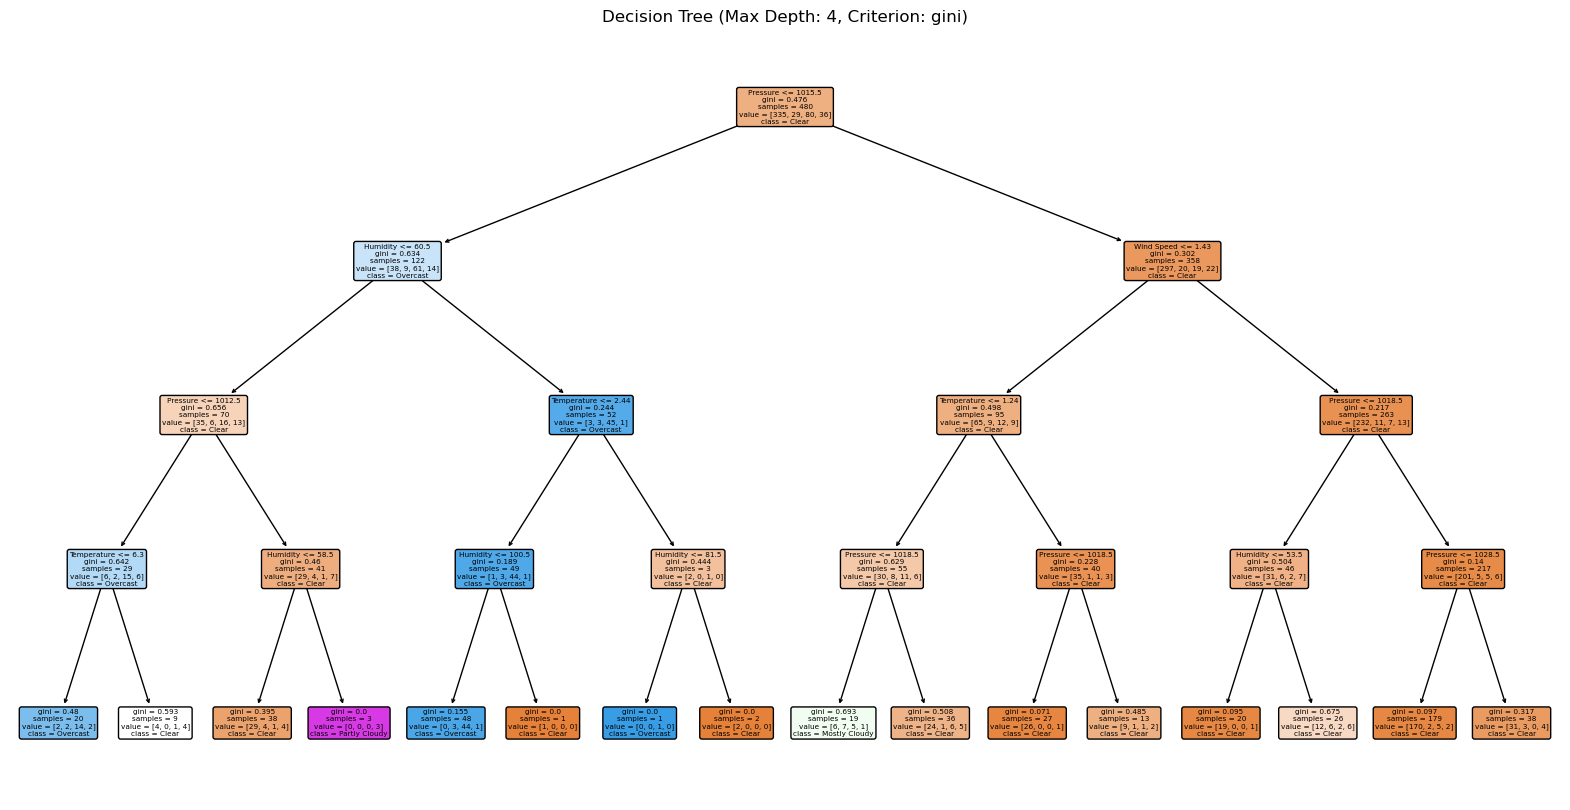

Decision Tree (Max Depth: 4, Criterion: gini)
Accuracy: 0.7167
Confusion Matrix:
[[69  4  7  0]
 [ 4  1  1  0]
 [ 5  0 16  1]
 [10  1  1  0]]




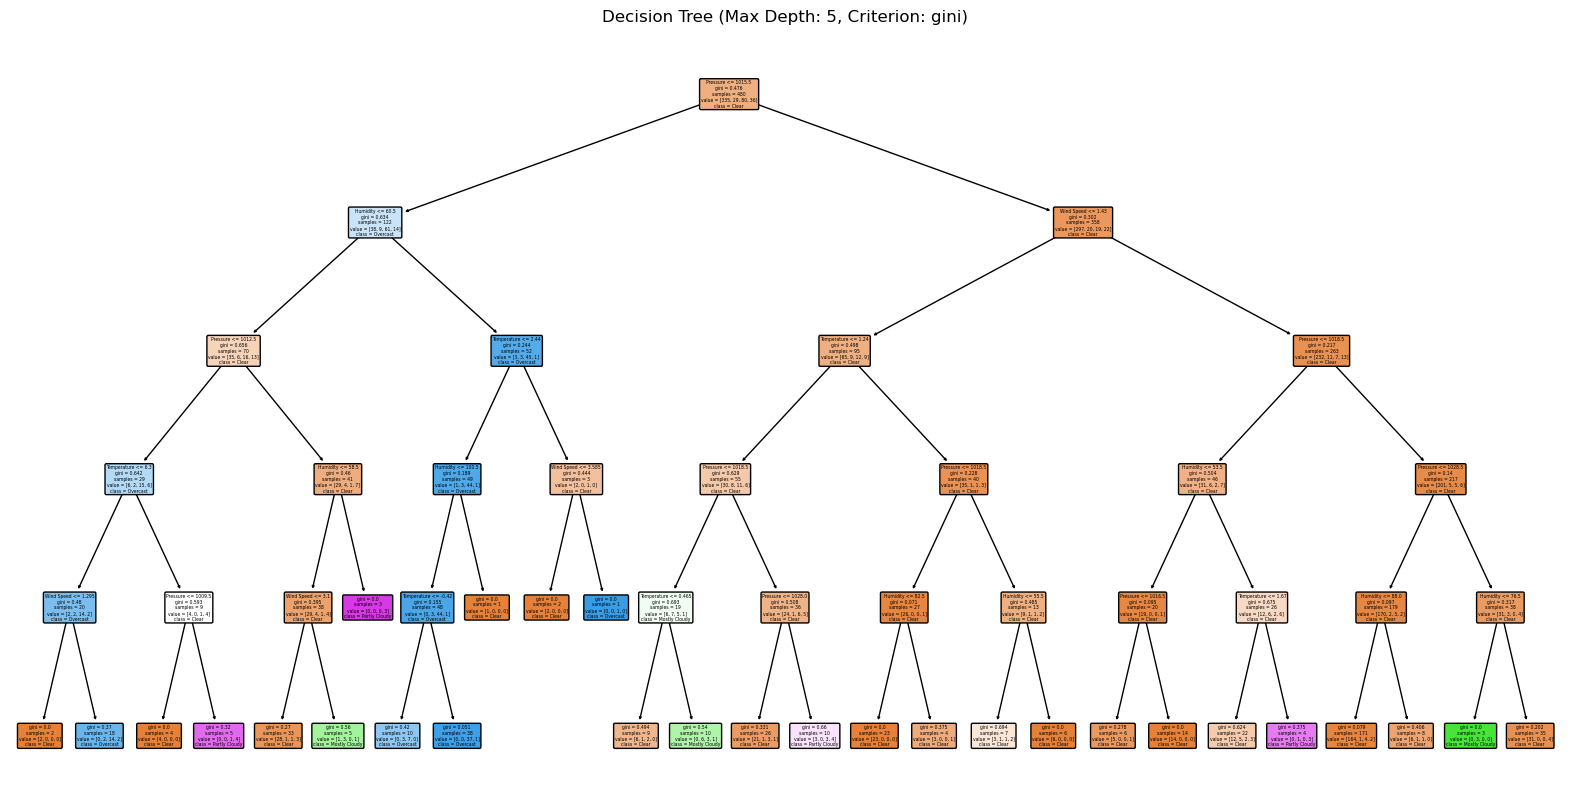

Decision Tree (Max Depth: 5, Criterion: gini)
Accuracy: 0.6917
Confusion Matrix:
[[66  4  6  4]
 [ 2  1  1  2]
 [ 2  3 16  1]
 [11  0  1  0]]




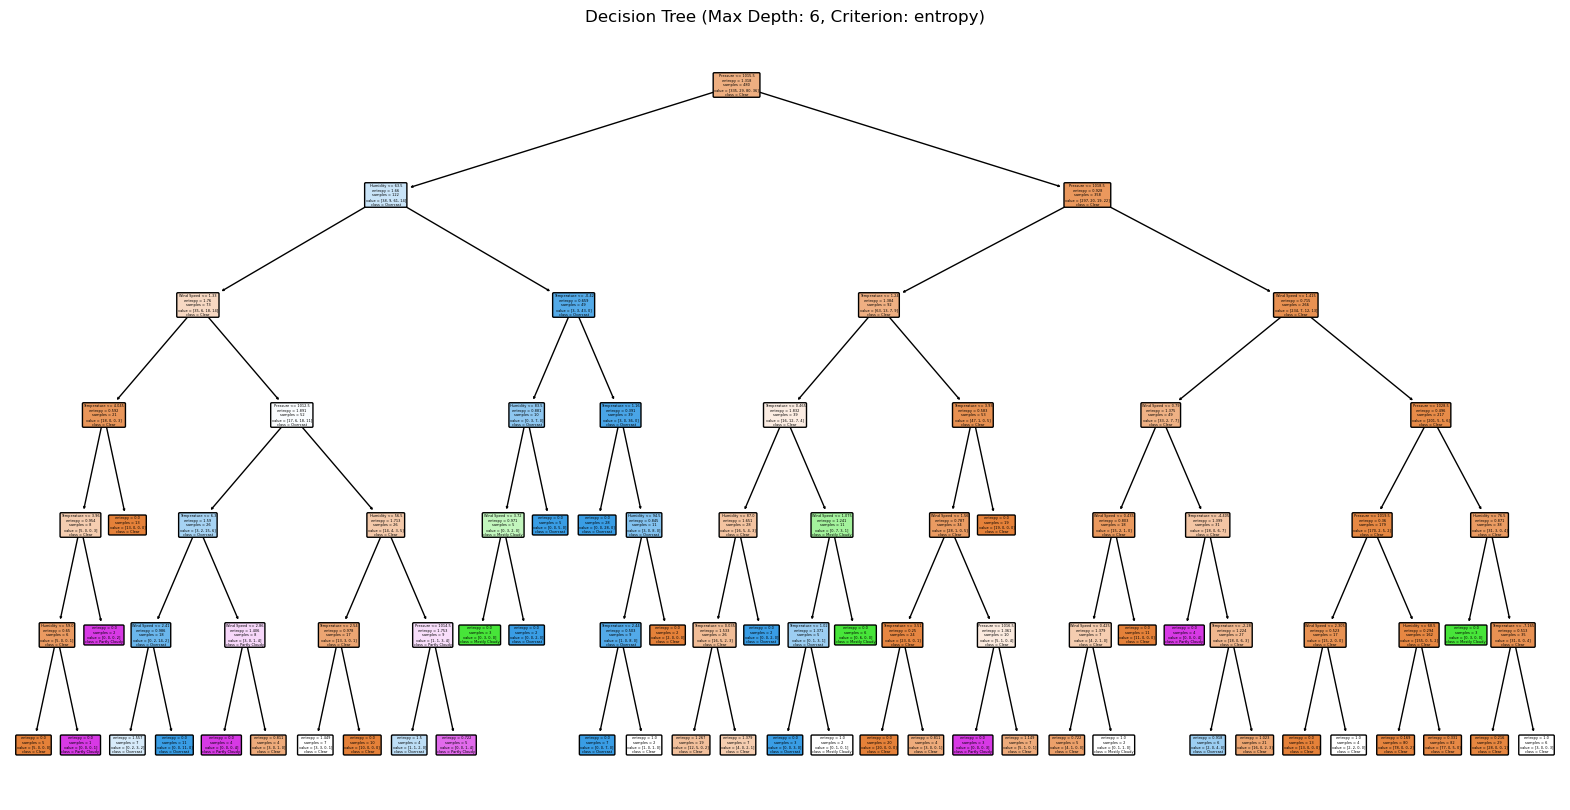

Decision Tree (Max Depth: 6, Criterion: entropy)
Accuracy: 0.6667
Confusion Matrix:
[[63  6  6  5]
 [ 3  0  2  1]
 [ 4  1 17  0]
 [11  0  1  0]]




In [72]:
# Function to create, visualize, and evaluate a decision tree
def create_visualize_evaluate_tree(max_depth, criterion='gini'):
    dt = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=42)
    dt.fit(X_train, y_train)
    
    plt.figure(figsize=(20,10))
    plot_tree(dt, feature_names=features, class_names=dt.classes_.tolist(), filled=True, rounded=True)
    plt.title(f"Decision Tree (Max Depth: {max_depth}, Criterion: {criterion})")
    plt.show()
    
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Decision Tree (Max Depth: {max_depth}, Criterion: {criterion})")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")
    
    return dt, accuracy, conf_matrix

# Create and evaluate three different decision trees
dt1, acc1, cm1 = create_visualize_evaluate_tree(max_depth=4)
dt2, acc2, cm2 = create_visualize_evaluate_tree(max_depth=5)
dt3, acc3, cm3 = create_visualize_evaluate_tree(max_depth=6, criterion='entropy')


In [73]:
# Compare accuracies
tree_accuracies = {
    'Decision Tree (Depth 4, Gini)': acc1,
    'Decision Tree (Depth 5, Gini)': acc2,
    'Decision Tree (Depth 6, Entropy)': acc3
}

print("Decision Tree Accuracy:", acc1)
print("Decision Tree Accuracy:", acc2)
print("Decision Tree Accuracy:", acc3)

Decision Tree Accuracy: 0.7166666666666667
Decision Tree Accuracy: 0.6916666666666667
Decision Tree Accuracy: 0.6666666666666666


In [9]:
df['Cloud_Binary'] = df['Cloud_Category'].apply(lambda x: 'Clear' if x == 'Clear' else 'Not Clear')

In [11]:
# Prepare data for binary classification
y_binary = df['Cloud_Binary']
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_binary, y_train_binary)
y_pred_lr = lr.predict(X_test_binary)
accuracy_lr = accuracy_score(y_test_binary, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test_binary, y_pred_lr)

# Adjusting the data to ensure non-negative values for MultinomialNB
# Adding a constant to make all features non-negative
X_train_binary_adjusted = X_train_binary - X_train_binary.min().min()
X_test__binary_adjusted = X_test_binary - X_train_binary.min().min()

# Multinomial Naive Bayes for binary classification
mnb_binary = MultinomialNB()
mnb_binary.fit(X_train_binary_adjusted, y_train_binary)
y_pred_mnb_binary = mnb_binary.predict(X_test__binary_adjusted)
accuracy_mnb_binary = accuracy_score(y_test_binary, y_pred_mnb_binary)
conf_matrix_mnb_binary = confusion_matrix(y_test_binary, y_pred_mnb_binary)

In [76]:
## 2. Visualizing Training and Testing Sets
print("\nTraining set shape:", X_train_binary.shape)
X_train_binary.head()


Training set shape: (480, 5)


,Temperature,Humidity,Pressure,Wind Speed,Visibility
145,0.18,64,1020,0.53,10000.0
9,-5.08,63,1024,5.04,10000.0
375,4.06,52,1015,0.16,10000.0
523,-11.12,81,1032,1.70,10000.0
188,-0.34,66,1016,1.90,10000.0


In [77]:
print("Testing set shape:", X_test_binary.shape)
X_test_binary.head()

Testing set shape: (120, 5)


,Temperature,Humidity,Pressure,Wind Speed,Visibility
110,5.03,50,1011,2.44,10000.0
419,-1.11,60,1023,1.95,10000.0
565,-9.05,76,1029,2.61,10000.0
77,-0.15,87,1015,0.74,10000.0
181,-2.56,60,1026,2.58,10000.0


In [78]:
# Value counts for y_train_binary
print("\ny_train_binary Value Counts:")
print(y_train_binary.value_counts())


y_train_binary Value Counts:
Clear        335
Not Clear    145
Name: Cloud_Binary, dtype: int64


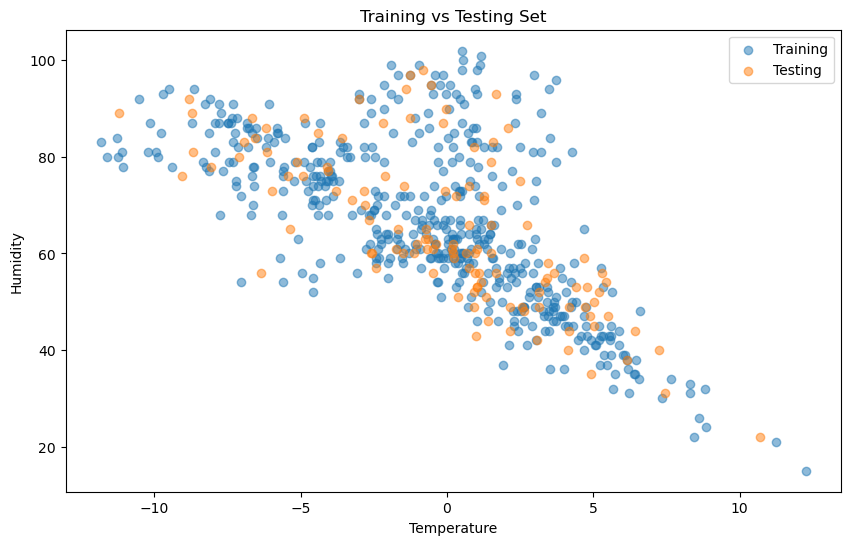

In [79]:
# Visualize the split
plt.figure(figsize=(10, 6))
plt.scatter(X_train_binary['Temperature'], X_train_binary['Humidity'], alpha=0.5, label='Training')
plt.scatter(X_test_binary['Temperature'], X_test_binary['Humidity'], alpha=0.5, label='Testing')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Training vs Testing Set')
plt.legend()
plt.show()

In [80]:
print("Multinomial NB Accuracy:", accuracy_mnb)
print("Bernoulli NB Accuracy:", accuracy_bnb)
print("Gaussian NB Accuracy:", accuracy_gnb)
print("Best Decision Tree Accuracy:", acc1)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Multinomial NB Binary Accuracy:", accuracy_mnb_binary)

Multinomial NB Accuracy: 0.625
Bernoulli NB Accuracy: 0.6666666666666666
Gaussian NB Accuracy: 0.13333333333333333
Best Decision Tree Accuracy: 0.7166666666666667
Logistic Regression Accuracy: 0.7166666666666667
Multinomial NB Binary Accuracy: 0.7


In [81]:
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_lr)
print("\nMultinomial NB Binary Confusion Matrix:")
print(conf_matrix_mnb_binary)

Logistic Regression Confusion Matrix:
[[77  3]
 [31  9]]

Multinomial NB Binary Confusion Matrix:
[[79  1]
 [35  5]]


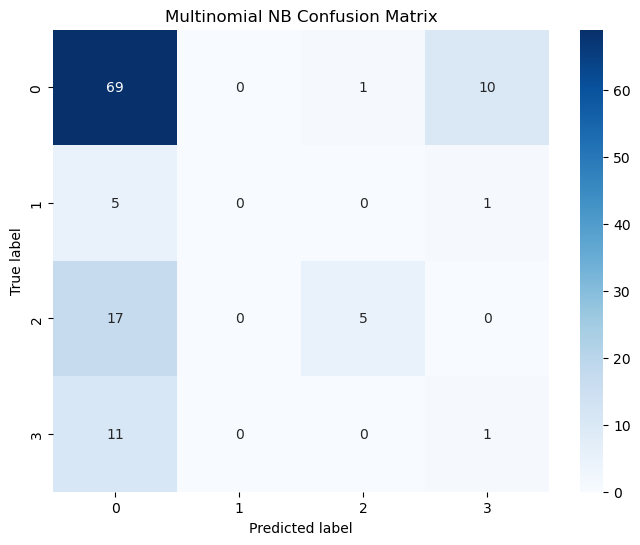

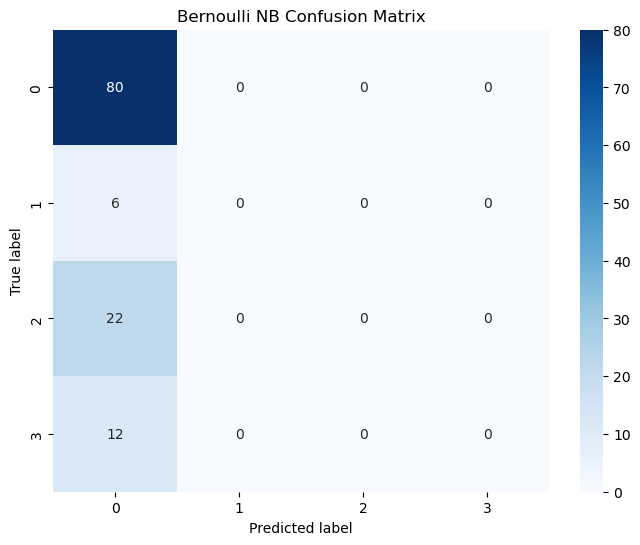

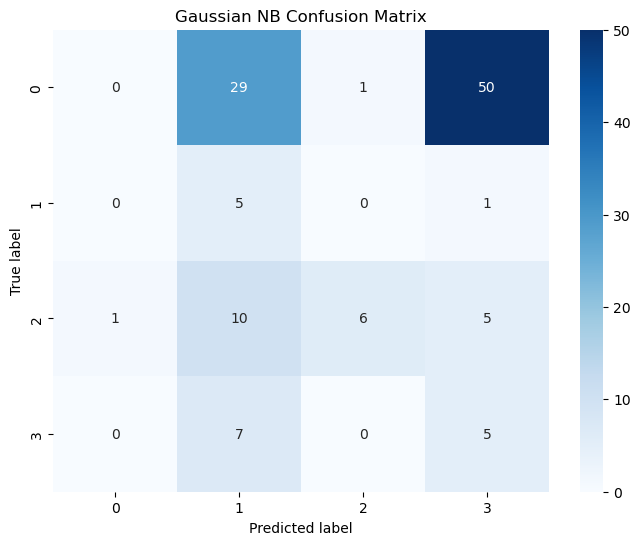

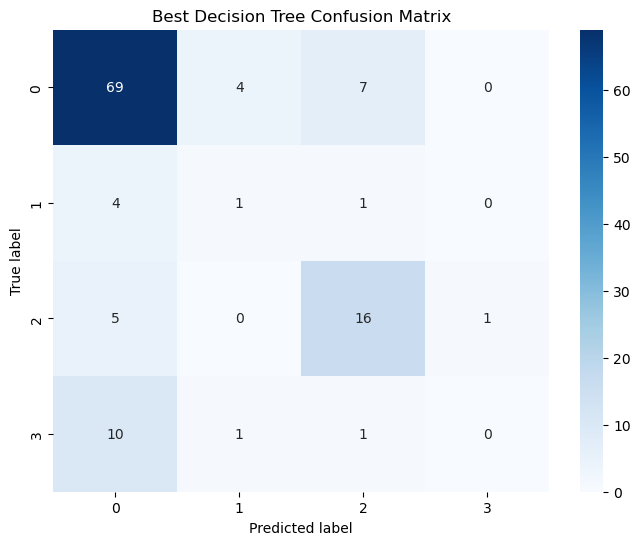

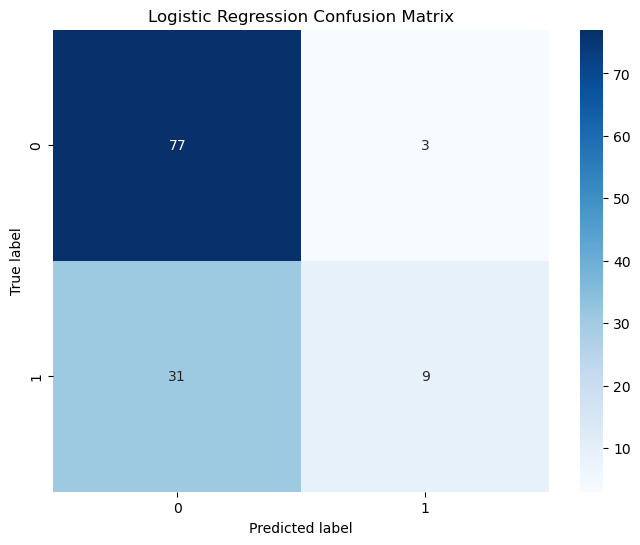

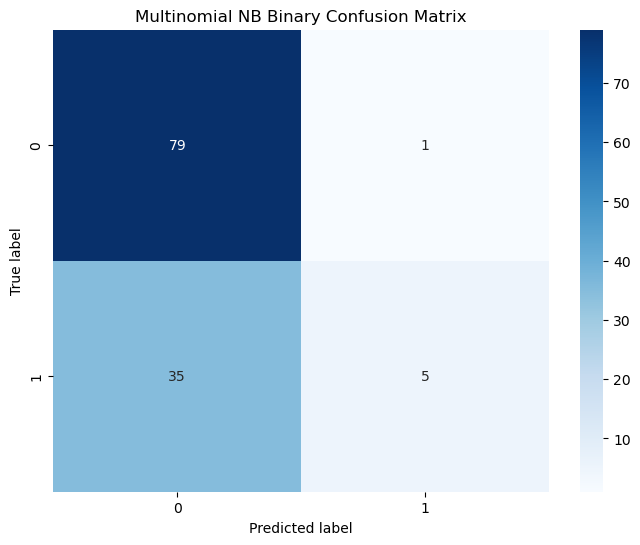

In [82]:
## 4. Visualizing and Comparing Results
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(conf_matrix_mnb, 'Multinomial NB Confusion Matrix')
plot_confusion_matrix(conf_matrix_bnb, 'Bernoulli NB Confusion Matrix')
plot_confusion_matrix(conf_matrix_gnb, 'Gaussian NB Confusion Matrix')
plot_confusion_matrix(cm1, 'Best Decision Tree Confusion Matrix')
plot_confusion_matrix(conf_matrix_lr, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(conf_matrix_mnb_binary, 'Multinomial NB Binary Confusion Matrix')